# Flights Data Exploration Challenge
In this challge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [88]:
import pandas as pd

df_flights = pd.read_csv('https://raw.githubusercontent.com/MicrosoftDocs/ml-basics/master/challenges/data/flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

* **Year**: The year of the flight (all records are from 2013)
* **Month**: The month of the flight
* **DayofMonth**: The day of the month on which the flight departed
* **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
* **Carrier**: The two-letter abbreviation for the airline.
* **OriginAirportID**: A unique numeric identifier for the departure aiport
* **OriginAirportName**: The full name of the departure airport
* **OriginCity**: The departure airport city
* **OriginState**: The departure airport state
* **DestAirportID**: A unique numeric identifier for the destination aiport
* **DestAirportName**: The full name of the destination airport
* **DestCity**: The destination airport city
* **DestState**: The destination airport state
* **CRSDepTime**: The scheduled departure time
* **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
* **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
* **CRSArrTime**: The scheduled arrival time
* **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
* **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
* **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1.   Start by cleaning the data.
  * Identify any null or missing data, and impute appropriate replacement values.
  * Identify and eliminate any outliers in the DepDelay and ArrDelay columns.

2.   Explore the cleaned data.
  * View summary statistics for the numeric fields in the dataset.
  * Determine the distribution of the DepDelay and ArrDelay columns.
  * Use statistics, aggregate functions, and visualizations to answer the following questions:
      * What are the average (mean) departure and arrival delays?
      * How do the carriers compare in terms of arrival delay performance?
      * Are some days of the week more prone to arrival days than others?
      * Which departure airport has the highest average departure delay?
      * Do late* departures tend to result in longer arrival delays than on-time departures?*
      * Which route (from origin airport to destination airport) has the most late* arrivals?*
      * Which route has the highest average arrival delay?

## Start by cleaning the data

### Identify any null or missing data, and impute appropriate replacement values.

In [89]:
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

When all nulls in each column are added up, we notice that only DepDel15 has null values. As the number of nulls is high (2761), it is necessary to find a value for replacing the nulls.

To do this, I will compare the null values of the column DepDel15 (indicates that the departure was delayed by more than 15 minutes) with DepDelay (indicates the delay time of the departure).

In [90]:
df_flights[['DepDelay','DepDel15']][df_flights.DepDel15.isnull()]

,DepDelay,DepDel15
171,0,NaN
359,0,NaN
429,0,NaN
545,0,NaN
554,0,NaN
...,...,...
271410,0,NaN
271607,0,NaN
271634,0,NaN
271671,0,NaN


In doing so, we notice that all (or most) of the null values of DepDel15 appear related to zero values of departure delay.

Therefor, considering that the departure delay time is zero, one solution to the null values of DepDel15 is to consider that these flights were not delayed and replace the null values by zero.

In [91]:
df_flights['DepDel15'].fillna(0, inplace=True)
df_flights.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

In this way, we no longer find null values in any column.

### Identify and eliminate any outliers in the DepDelay and ArrDelay columns.

Minimum:-63.00
Mean:10.35
Median:-1.00
Mode:-3.00
Maximum:1425.00

Minimum:-75.00
Mean:6.50
Median:-3.00
Mode:0.00
Maximum:1440.00



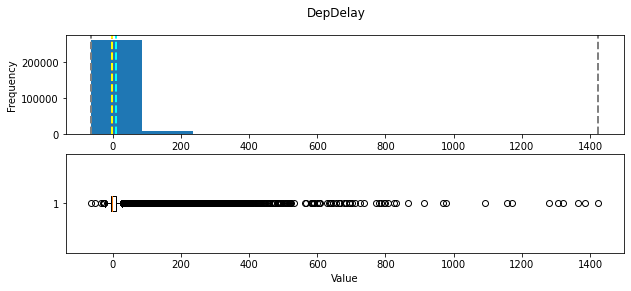

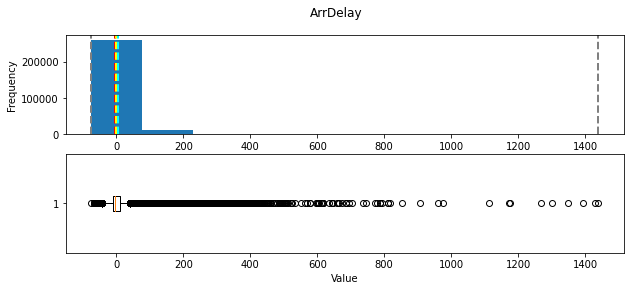

In [92]:
def distribution(column):
  from matplotlib import pyplot as plt

  # Get statistics
  min_val = column.min()
  max_val = column.max()
  mean_val = column.mean()
  med_val = column.median()
  mod_val = column.mode()[0]

  print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))
  
  # Create a figure for 2 subplots (2 rows, 1 column)
  fig, ax = plt.subplots(2, 1, figsize = (10,4))

  # Plot the histogram   
  ax[0].hist(column)
  ax[0].set_ylabel('Frequency')

  # Add lines for the mean, median, and mode
  ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
  ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
  ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
  ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
  ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

  # Plot the boxplot   
  ax[1].boxplot(column, vert=False)
  ax[1].set_xlabel('Value')

  # Add a title to the Figure
  fig.suptitle(column.name)

  # Show the figure
  fig.show()

distribution(df_flights['DepDelay'])
distribution(df_flights['ArrDelay'])

To identify the outliers, I adapted a function studied in Microsoft Learn's "Foundations of data science for machine learning" course. In it, we can analyze statistical metrics (Minimum, Mean, Median, Mode and Maximum) and statistical graphics (Histogram and Box Plot).

When analyzing the results of the function applied to departure delays and arrival delays, we notice outliers that complicate and pollute the data analysis. To clean the data, I will eliminate the values smaller than 1 percentile and larger than 90 percentile.

Minimum:-11.00
Mean:-0.13
Median:-2.00
Mode:-3.00
Maximum:36.00

Minimum:-32.00
Mean:-5.68
Median:-6.00
Mode:0.00
Maximum:16.00



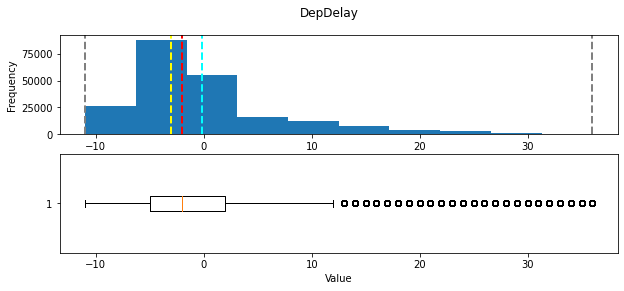

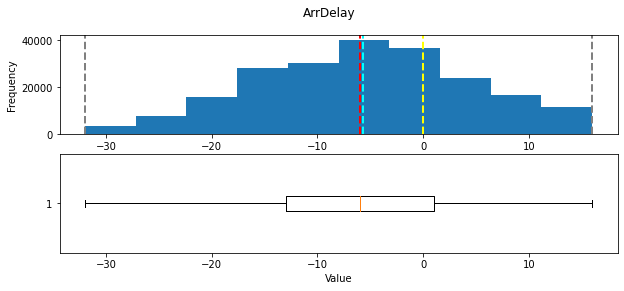

In [93]:
import numpy as np

new_min_depDelay = np.percentile(df_flights.DepDelay, 1)
new_max_depDelay = np.percentile(df_flights.DepDelay, 90)
df_flights = df_flights[df_flights.DepDelay > new_min_depDelay]
df_flights = df_flights[df_flights.DepDelay < new_max_depDelay]

new_min_arrDelay = np.percentile(df_flights.ArrDelay, 1)
new_max_arrDelay = np.percentile(df_flights.ArrDelay, 90)
df_flights = df_flights[df_flights.ArrDelay > new_min_arrDelay]
df_flights = df_flights[df_flights.ArrDelay < new_max_arrDelay]

distribution(df_flights['DepDelay'])
distribution(df_flights['ArrDelay'])

By doing this and calling the function again, we notice that the data is cleaner, which makes it easier to interpret and does not pollute the metrics.

With the data cleaned, we can move on to the analysis.

## Explore the cleaned data.

### View summary statistics for the numeric fields in the dataset.

In [94]:
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,214500.0,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000
mean,2013.0,7.027296,15.799389,3.904168,12755.329371,12734.206438,1284.230942,-0.130452,0.057604,1465.878522,-5.680522,0.032597,0.013305
std,0.0,2.006267,8.853235,1.998344,1512.139480,1506.103555,470.230018,7.260672,0.232993,487.646410,10.188473,0.177579,0.114579
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-11.000000,0.000000,1.000000,-32.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,853.000000,-5.000000,0.000000,1055.000000,-13.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1240.000000,-2.000000,0.000000,1448.000000,-6.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14100.000000,14057.000000,1658.000000,2.000000,0.000000,1850.000000,1.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,36.000000,1.000000,2359.000000,16.000000,1.000000,1.000000


To generate descriptive statistics, I used the describe function from the pandas library. 

"*Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.*" (Pandas Documentation)

### Determine the distribution of the DepDelay and ArrDelay columns.

Minimum:-11.00
Mean:-0.13
Median:-2.00
Mode:-3.00
Maximum:36.00

Minimum:-32.00
Mean:-5.68
Median:-6.00
Mode:0.00
Maximum:16.00



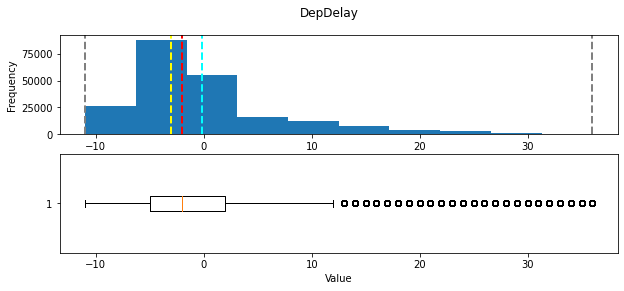

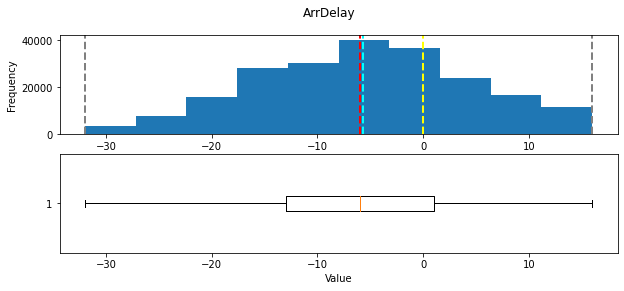

In [95]:
distribution(df_flights['DepDelay'])
distribution(df_flights['ArrDelay'])

### Use statistics, aggregate functions, and visualizations to answer the following questions:


#### What are the average (mean) departure and arrival delays?

In [96]:
print('DepDelay: ', df_flights['DepDelay'].mean())
print('ArrDelay: ', df_flights['ArrDelay'].mean())

DepDelay:  -0.13045221445221444
ArrDelay:  -5.680522144522144


By analyzing the mean departure delay and arrival delay, we see that, on mean, flights are not delay departure and arrive a few minutes before the scheduled arrival time.

#### How do the carriers compare in terms of arrival delay performance?

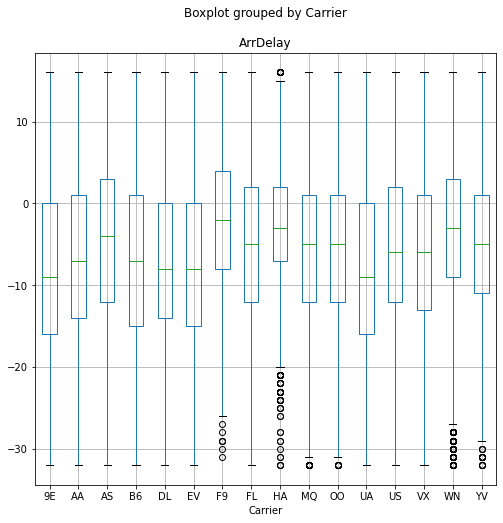

In [97]:
df_flights.boxplot(column='ArrDelay', by='Carrier', figsize=(8,8))

By generating a delay arrival box plot based on carriers, we observed that some carriers (such as 9E, DL, EV and UA) tend to delay arrival less frequently than others (such as AS, F9, US and WN).

#### Are some days of the week more prone to arrival days than others?

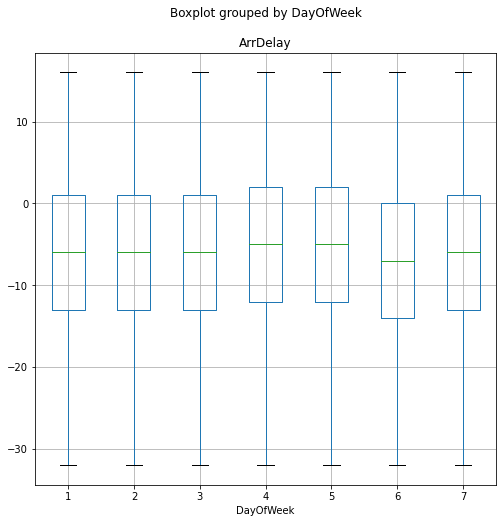

In [98]:
df_flights.boxplot(column='ArrDelay', by='DayOfWeek', figsize=(8,8))

Generating a boxplot of delay arrival based on the day of the week, we note that Friday is the slightly more prone to arrival than others. However, the other days have little tendency to delay.

#### Which departure airport has the highest average departure delay?

In [99]:
g_airports = df_flights.groupby(df_flights.OriginAirportName)
df_airports = pd.DataFrame(g_airports['DepDelay'].mean()).sort_values('DepDelay', ascending=False)
df_airports

,DepDelay
OriginAirportName,
Chicago Midway International,3.865294
Dallas Love Field,3.039141
William P Hobby,2.706247
Denver International,1.863804
Baltimore/Washington International Thurgood Marshall,1.805401
...,...
Tucson International,-2.522114
Richmond International,-2.665944
Ted Stevens Anchorage International,-2.886700


By grouping the flights by airport, I created a Data Frame with the mean departure delays for each, sorting the airports from the highest average delay to the lowest.

This way I can generate a sorted table.

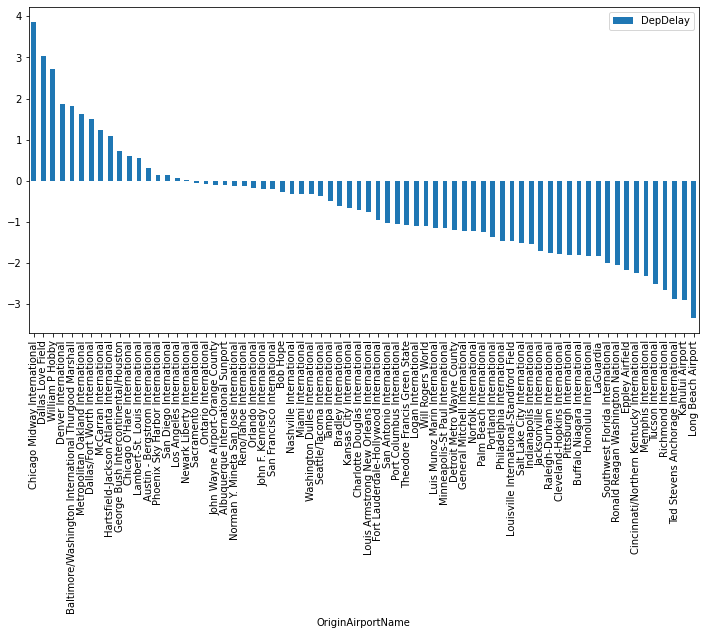

In [100]:
df_airports.plot.bar(figsize=(12,6))

In analyzing the generated bar chart, we notice that **Chicago Midway International Airport** has the highest mean number of delayed departures.

#### Do late departures tend to result in longer arrival delays than on-time departures?

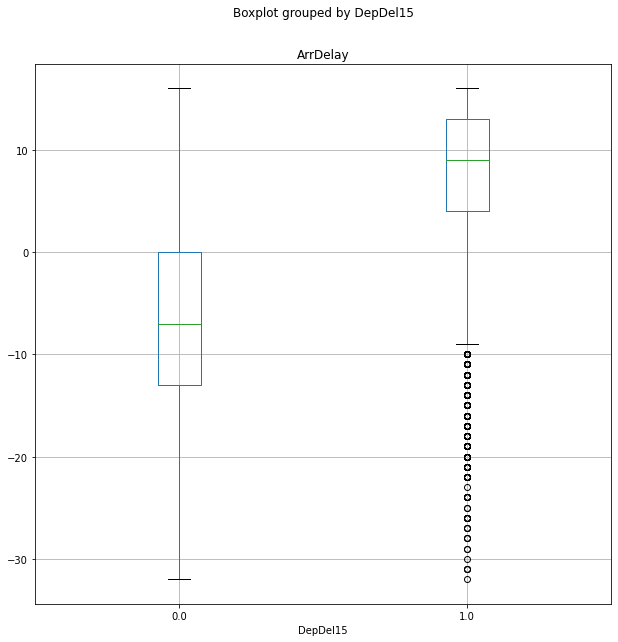

In [101]:
df_flights.boxplot(column='ArrDelay', by='DepDel15', figsize=(10,10))

Generating a boxplot of delay arrival based on the DepDel15, we note that yes, late departures tend to result in greater delays in arrival than on-time departures

#### Which route (from origin airport to destination airport) has the most late arrivals?

In [102]:
# Add a routes column
routes  = pd.Series(df_flights['OriginAirportName'] + ' > ' + df_flights['DestAirportName'])
df_flights = pd.concat([df_flights, routes.rename("Route")], axis=1)

Since there was no routes column, I created one and added it to the Data Frame df_flights

In [103]:
# Group by routes
g_routes = df_flights.groupby(df_flights.Route)
pd.DataFrame(g_routes['ArrDel15'].sum()).sort_values('ArrDel15', ascending=False)

,ArrDel15
Route,
San Francisco International > Los Angeles International,67
Los Angeles International > San Francisco International,42
Detroit Metro Wayne County > Chicago O'Hare International,29
LaGuardia > Logan International,29
LaGuardia > Chicago O'Hare International,27
...,...
Norman Y. Mineta San Jose International > Honolulu International,0
Norman Y. Mineta San Jose International > Hartsfield-Jackson Atlanta International,0
Norman Y. Mineta San Jose International > George Bush Intercontinental/Houston,0


By grouping the flights by route, I created a Data Table with the sum of all flights with arrival delays longer than 15 minutes.

So, we can see that the "San Francisco International > Los Angeles International" route has the most late arrivals.

#### Which route has the highest average arrival delay?

In [104]:
df_routes = pd.DataFrame(g_routes['ArrDelay'].mean()).sort_values('ArrDelay', ascending=False)
df_routes

,ArrDelay
Route,
Theodore Francis Green State > Southwest Florida International,12.000000
Charlotte Douglas International > General Mitchell International,10.000000
Indianapolis International > Philadelphia International,10.000000
Port Columbus International > Logan International,7.000000
Cleveland-Hopkins International > Philadelphia International,7.000000
...,...
Lambert-St. Louis International > Cleveland-Hopkins International,-20.000000
Jacksonville International > Chicago Midway International,-20.000000
Eppley Airfield > LaGuardia,-20.750000


Sorting the routes from the highest mean arrive delay to the lowest, we note that, the route with the longest mean delay is "Theodore Francis Green State > Southwest Florida International "

# References
* Foundations of data science for machine learning (Microsoft Learn)
* https://github.com/MicrosoftDocs/ml-basics/blob/master/challenges/01%20-%20Flights%20Challenge.ipynb